In [2]:
# Data viz with Pandas

In [7]:
import pandas as pd

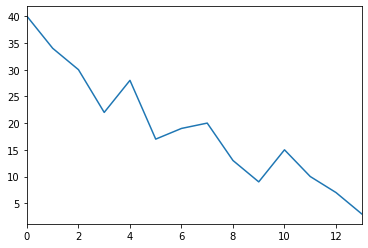

In [8]:
#Creating a simple line plot
a = pd.Series([40, 34, 30, 22, 28, 17, 19, 20, 13, 9, 15, 10, 7, 3])
a.plot()

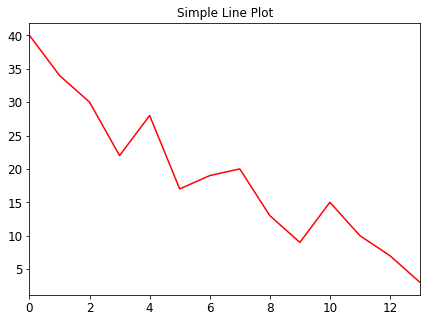

In [10]:
a.plot(figsize=(7, 5), color='red', title = 'Simple Line Plot', fontsize=12)

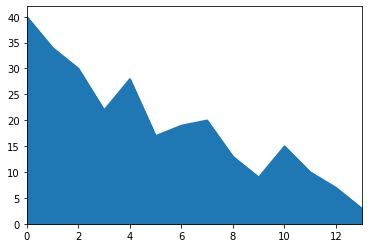

In [13]:
# Creating a area plot
a.plot.area()

In [14]:
b = pd.Series([45, 22, 12, 9, 20, 34, 28, 19, 26, 38, 41, 24, 14, 32])
c = pd.Series([25, 38, 33, 38, 23, 12, 30, 37, 34, 22, 16, 24, 12, 9])
d = pd.DataFrame({'a':a, 'b': b, 'c': c})

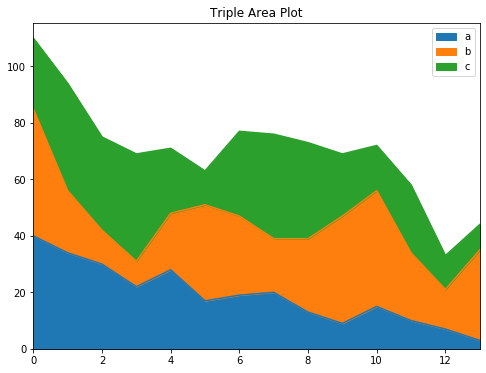

In [15]:
d.plot.area(figsize=(8,6), title='Triple Area Plot')

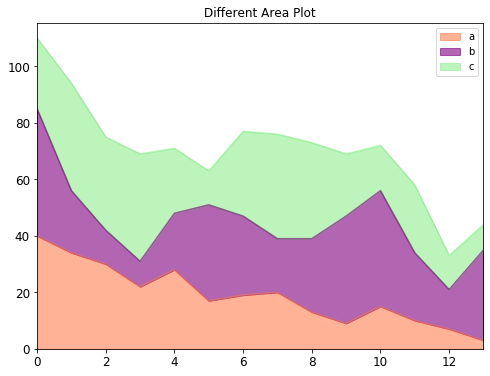

In [18]:
d.plot.area(alpha=0.6, color=['coral', 'purple', 'lightgreen'], figsize=(8, 6), title='Different Area Plot', fontsize=12)

In [24]:
# Access sample data
df=pd.read_csv("~/mydata/nhanes_2015_2016.csv")
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [25]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

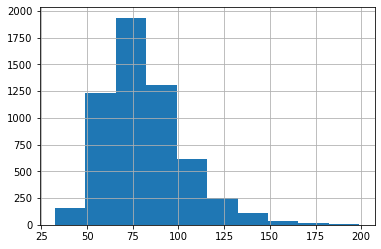

In [26]:
# Create a histogram for weight distribution (BMXWT)
df['BMXWT'].hist()

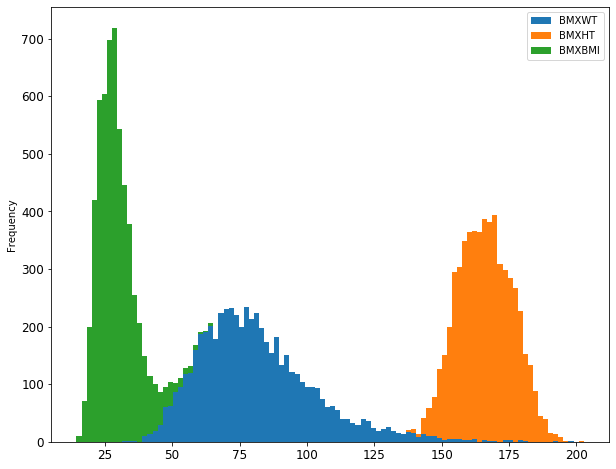

In [32]:
# Stacked histograms, larger bins (weight, height, BMI)
df[['BMXWT', 'BMXHT', 'BMXBMI']].plot.hist(stacked=True, bins=100, fontsize=12, figsize=(10, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f696effcc10>,
      dtype=object)

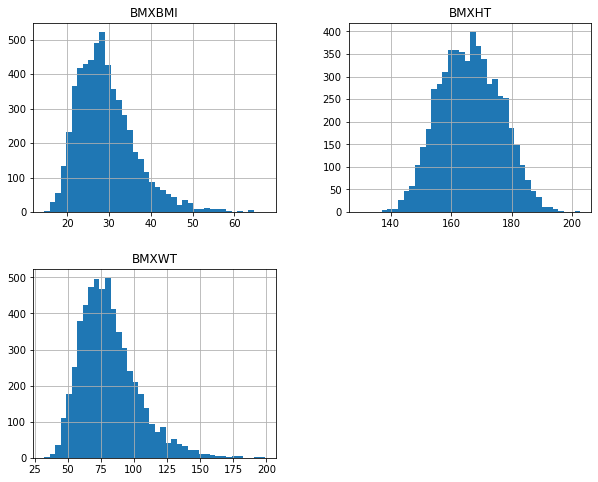

In [35]:
# Three different histograms
df[['BMXWT', 'BMXHT', 'BMXBMI']].hist(bins=40,figsize=(10, 8))

In [36]:
# Blood pressure and level of education
# Change numeric values to strings
df["DMDEDUC2x"] = df.DMDEDUC2.replace({1: "less than 9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 7: "Refused", 9: "Don't know"})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f696ede13d0>,
      dtype=object)

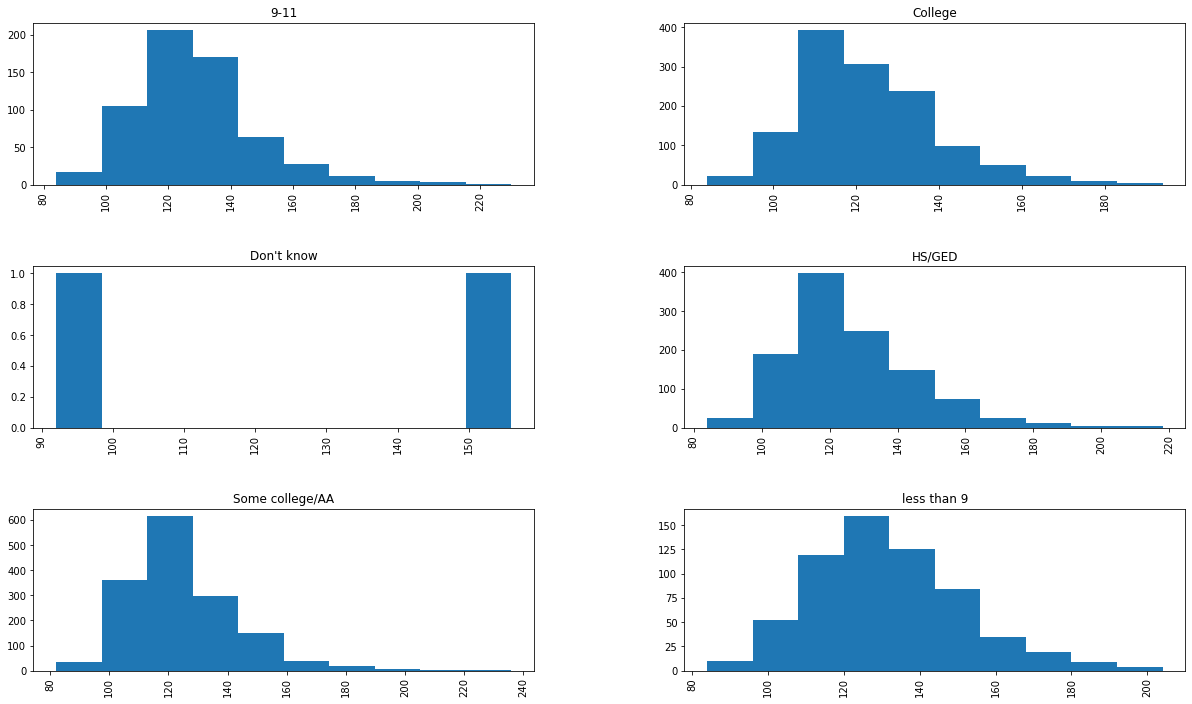

In [40]:
df[['DMDEDUC2x', 'BPXSY1']].hist(by='DMDEDUC2x', figsize=(20,12))

In [41]:
# Bar plotting
# Blood pressure change with maritial status
# Change numeric values to strings
df["DMDMARTLx"] = df.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 6: "Living w/partner", 77: "Refused"})

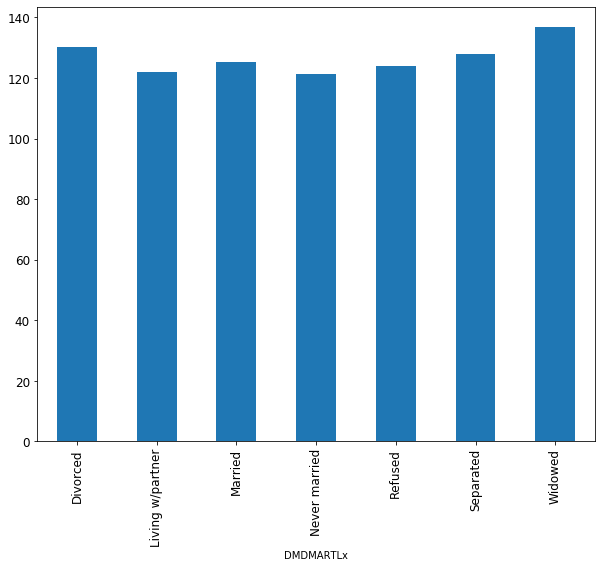

In [45]:
# Group by martial status and derive mean values for blood pressure
df.groupby('DMDMARTLx')['BPXSY1'].mean().plot(kind='bar', fontsize=12, figsize=(10, 8))

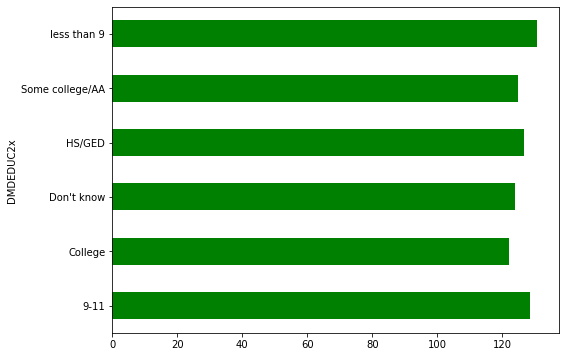

In [50]:
# Horizontal orientation, green bars
df.groupby('DMDEDUC2x')['BPXSY1'].mean().plot(kind='barh', color='green', fontsize=10, figsize=(8, 6))

In [51]:
# Group multiple variables in a bar plot
# Weight, height, BMI by ethnic origin
df_bmx = df.groupby('RIDRETH1')['BMXWT', 'BMXHT', 'BMXBMI'].mean().reset_index()

In [52]:
df_bmx

,RIDRETH1,BMXWT,BMXHT,BMXBMI
0,1,81.400300,161.916650,30.965900
1,2,79.388338,162.695442,29.928150
2,3,83.703412,169.103730,29.199559
3,4,86.330687,168.457415,30.399751
4,5,71.365436,164.598322,26.152125


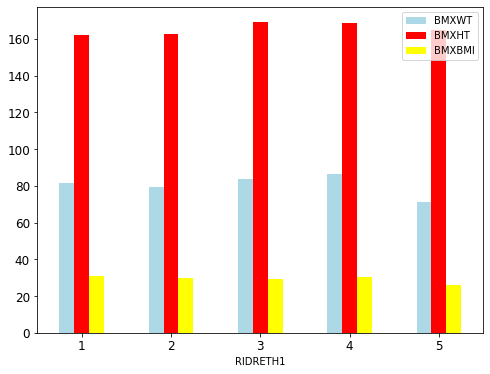

In [63]:
df_bmx.plot(x = 'RIDRETH1', 
            y=['BMXWT', 'BMXHT', 'BMXBMI'], 
            kind = 'bar', 
            color = ['lightblue', 'red', 'yellow'], 
            fontsize=12, figsize=(8, 6), rot=0)

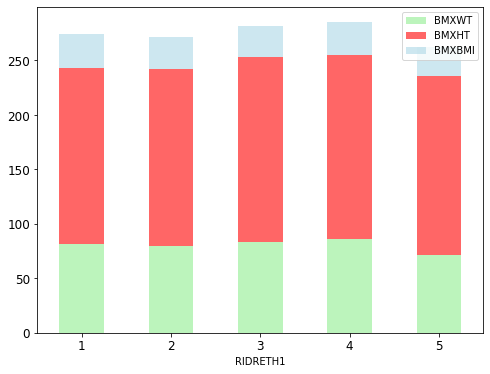

In [67]:
# Stacked bar plot
df_bmx.plot(x = 'RIDRETH1', 
            y=['BMXWT', 'BMXHT', 'BMXBMI'], 
            kind = 'bar', stacked=True,
            alpha = 0.6,
            color = ['lightgreen', 'red', 'lightblue'], 
            fontsize=12, figsize=(8, 6), rot=0)

In [68]:
# Pie plotting
# Marital status and education. Relationship
df_edu_marit = df.groupby('DMDEDUC2x')['DMDMARTL'].count()
pd.Series(df_edu_marit)

DMDEDUC2x
9-11                643
College            1366
Don't know            3
HS/GED             1186
Some college/AA    1621
less than 9         655
Name: DMDMARTL, dtype: int64

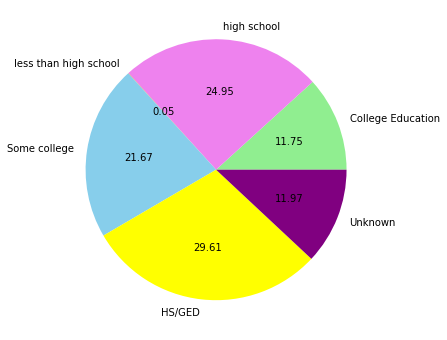

In [70]:
ax = pd.Series(df_edu_marit).plot.pie(subplots=True, label='',
     labels = ['College Education', 'high school', 'less than high school', 'Some college',
     'HS/GED', 'Unknown'],
     figsize = (8, 6),
     colors = ['lightgreen', 'violet', 'coral', 'skyblue', 'yellow', 'purple'], autopct = '%.2f')

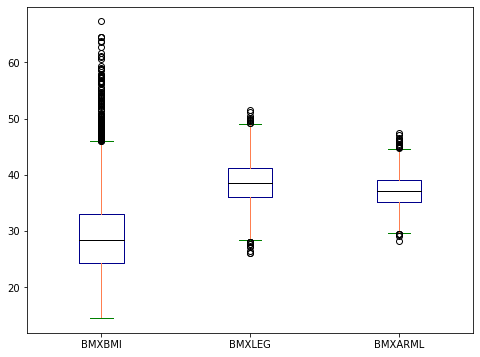

In [71]:
# Simple boxplot
color = {'boxes': 'DarkBlue', 'whiskers': 'coral', 
         'medians': 'Black', 'caps': 'Green'}
df[['BMXBMI', 'BMXLEG', 'BMXARML']].plot.box(figsize=(8, 6),color=color)

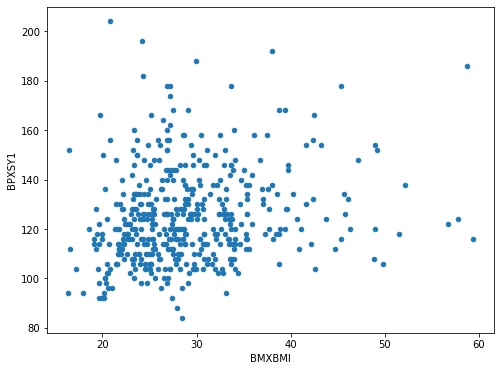

In [77]:
# Scatter plotting
# Simple plot with the relationship between BMI and blood pressure
# Sample of 500 records
df.head(500).plot(x='BMXBMI', y='BPXSY1', kind='scatter', figsize=(8,6))

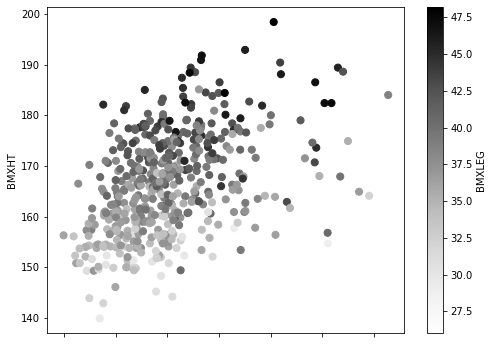

In [76]:
# Add a third parameter. Include gradient based on leg length
df.head(500).plot.scatter(x='BMXWT', y='BMXHT', c='BMXLEG', s=50, figsize=(8,6))

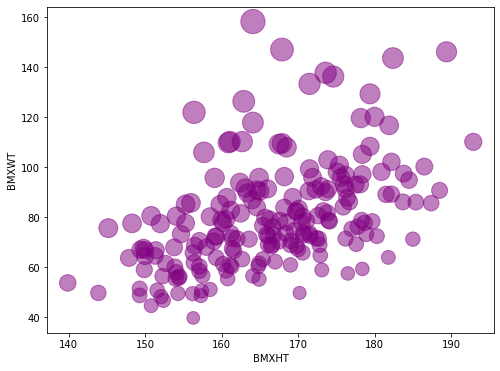

In [81]:
# Adding a third parameter with size differences
df.head(200).plot.scatter(x='BMXHT', y='BMXWT', s = df['BMXBMI'][:200]*10, alpha=0.5,
                         color='purple', figsize=(8,6))

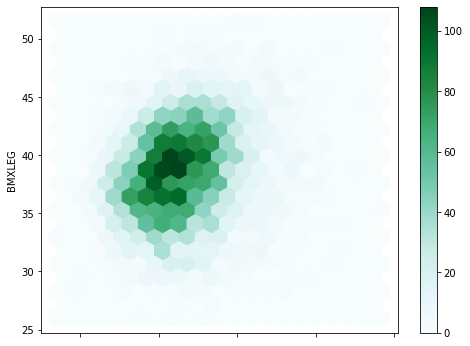

In [84]:
# Hexbin plot. Large clusters. Dense data viz
df.plot.hexbin(x='BMXARMC', y='BMXLEG', gridsize=20, figsize=(8,6))

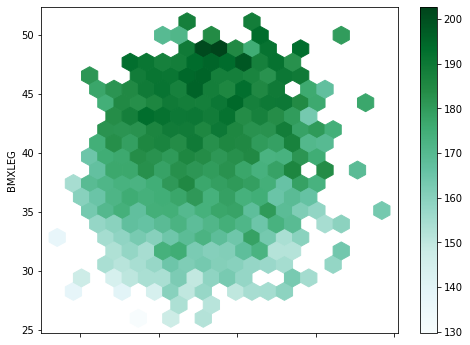

In [91]:
df.plot.hexbin(x='BMXARMC', y='BMXLEG', C = 'BMXHT', 
               reduce_C_function=max, gridsize=20, figsize=(8,6))

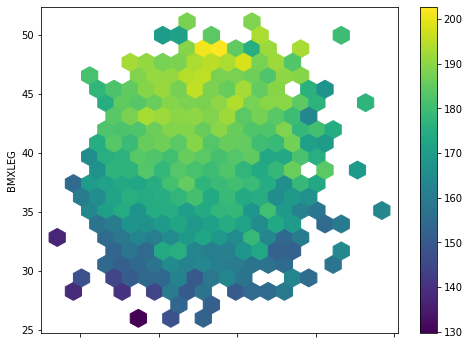

In [94]:
# Color code instead of shading
df.plot.hexbin(x='BMXARMC', y='BMXLEG', C = 'BMXHT',
                         reduce_C_function=max, gridsize=20, figsize=(8,6),
                        cmap = 'viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f696e9a2130>,
      dtype=object)

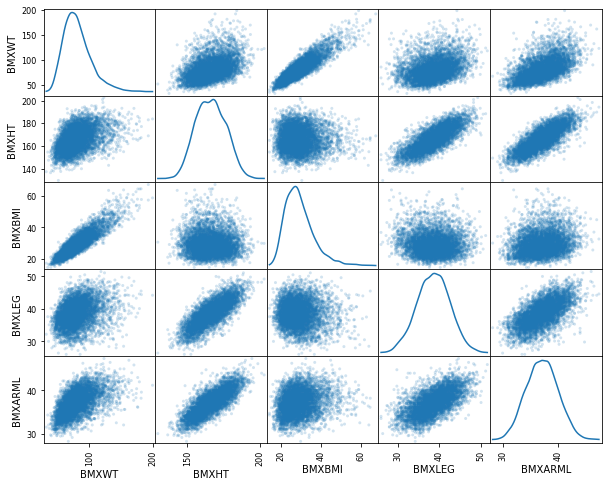

In [95]:
# Advanced plotting
# Scatter Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df[['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML']], alpha = 0.2, figsize=(10, 8), diagonal = 'kde')

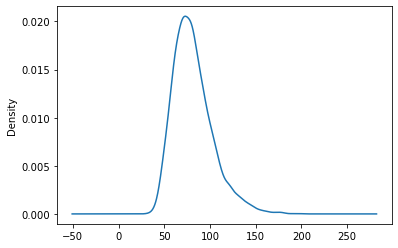

In [96]:
# KDE or density plots. Probability distribution
df['BMXWT'].plot.kde()

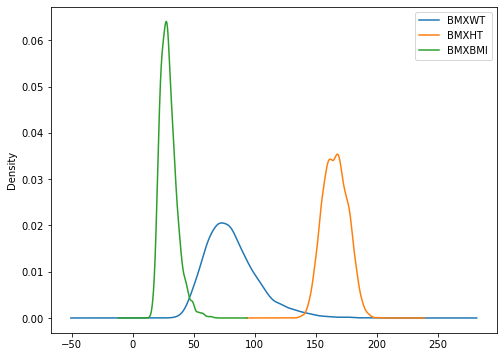

In [97]:
# Prob dist. of height, weight & BMI
df[['BMXWT','BMXHT','BMXBMI']].plot.kde(figsize=(8,6))

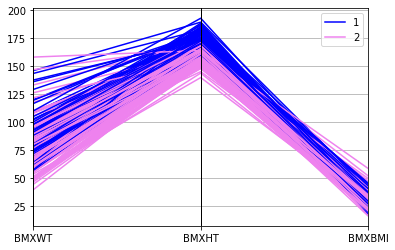

In [105]:
# Parallel Coordinates. Check differences between clusters
# Difference in 3 parameters between men (1) and women (2)
from pandas.plotting import parallel_coordinates
parallel_coordinates(df[['BMXWT', 'BMXHT', 'BMXBMI', 'RIAGENDR']].dropna().head(200), 'RIAGENDR', color=['blue', 'violet'])

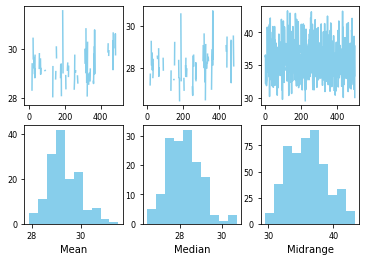

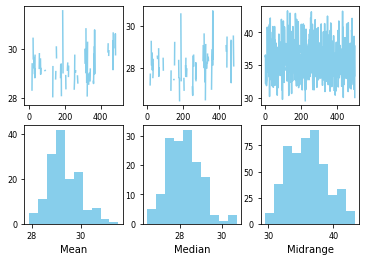

In [108]:
# Bootstrap plot
# Assess uncertainty of the dataset
# It runs statistical stats (mean, median, midrange) for random samples 500 times (defined)
from pandas.plotting import bootstrap_plot
bootstrap_plot(df['BMXBMI'], size=100, samples=500, color='skyblue')